In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
With_mask = os.listdir(r"E:\python\mathmatic\datas\archive\data\with_mask")
print(With_mask[0:5])
print(With_mask[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [5]:
Without_mask = os.listdir(r"E:\python\mathmatic\datas\archive\data\without_mask")
print(Without_mask[:5])
print(Without_mask[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [7]:
len(With_mask), len(Without_mask)

(3725, 3828)

In [11]:
with_mask_label = [1] * len(With_mask)
without_mask_label = [0] * len(Without_mask)
len(with_mask_label), len(without_mask_label)

(3725, 3828)

In [13]:
print(with_mask_label[:5])
print(without_mask_label[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
label = with_mask_label + without_mask_label
len(label)

7553

<function matplotlib.pyplot.show(close=None, block=None)>

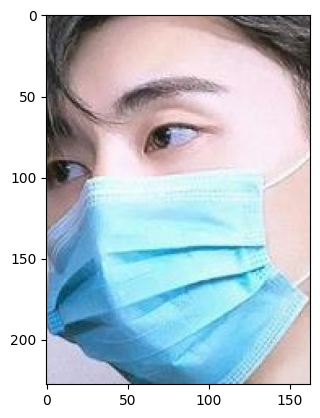

In [17]:
img = mping.imread(r"E:\python\mathmatic\datas\archive\data\with_mask\with_mask_1545.jpg")
implot = plt.imshow(img)
plt.show

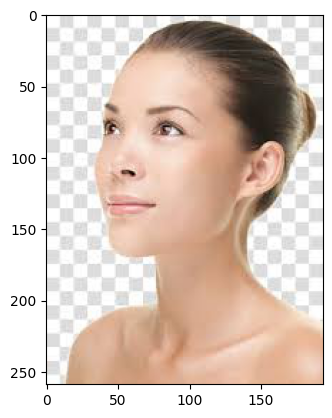

In [19]:
img1 = mping.imread(r"E:\python\mathmatic\datas\archive\data\without_mask\without_mask_2925.jpg")
im1plot = plt.imshow(img1)
plt.show();

In [21]:
with_mask_path = "E:\\python\\mathmatic\\datas\\archive\\data\\with_mask\\"

data = []

for img_file in With_mask:
    
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128, 128))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

C:\Users\hamid\anaconda3\envs\MachineLearning\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
without_mask_path = "E:\\python\\mathmatic\\datas\\archive\\data\\without_mask\\"

for img_file in Without_mask:
    
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128, 128))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

In [37]:
len(data), type(data)

(7553, list)

In [47]:
len(data[0])

128

In [49]:
type(data[0]), data[0].shape

(numpy.ndarray, (128, 128, 3))

In [51]:
X = np.array(data)
y = np.array(label)

In [53]:
type(X),X.shape, type(y), y.shape

(numpy.ndarray, (7553, 128, 128, 3), numpy.ndarray, (7553,))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [59]:
X_train_scale = X_train / 255
X_test_scale = X_test / 255

In [61]:
import tensorflow as tf
from tensorflow import keras

In [63]:
num_classes = 2

model = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=tf.keras.activations.relu, input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation=tf.keras.activations.sigmoid)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

history = model.fit(X_train_scale, y_train, validation_split=0.1, epochs=5)



Epoch 1/5


170/170 [==============================] - 29s 134ms/step - loss: 0.4740 - accuracy: 0.8003 - val_loss: 0.2638 - val_accuracy: 0.8992
Epoch 2/5
170/170 [==============================] - 22s 129ms/step - loss: 0.2949 - accuracy: 0.8832 - val_loss: 0.2348 - val_accuracy: 0.9190
Epoch 3/5
170/170 [==============================] - 22s 129ms/step - loss: 0.2414 - accuracy: 0.9044 - val_loss: 0.2019 - val_accuracy: 0.9372
Epoch 4/5
170/170 [==============================] - 22s 129ms/step - loss: 0.2120 - accuracy: 0.9196 - val_loss: 0.2356 - val_accuracy: 0.9289
Epoch 5/5
170/170 [==============================] - 22s 129ms/step - loss: 0.1817 - accuracy: 0.9308 - val_loss: 0.2070 - val_accuracy: 0.9421


In [65]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy is : {accuracy}")
print(f"The loss is : {loss}")

48/48 [==============================] - 2s 25ms/step - loss: 36.1254 - accuracy: 0.8928
Test accuracy is : 0.8927862048149109
The loss is : 36.125404357910156


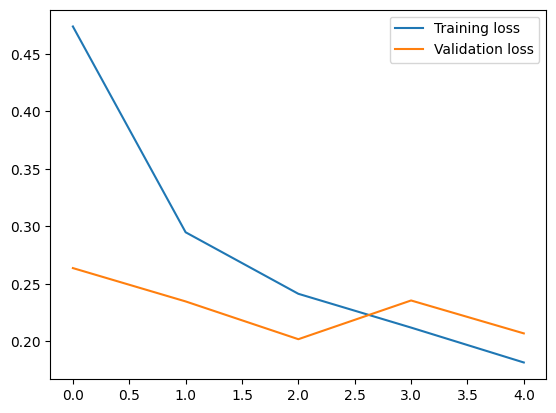

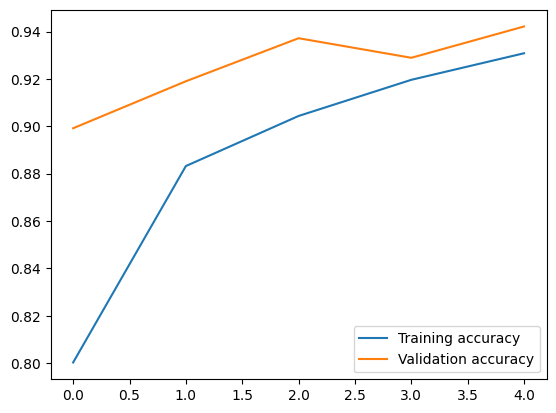

In [67]:
h = history
plt.plot(h.history['loss'], label="Training loss")
plt.plot(h.history['val_loss'], label='Validation loss')
plt.legend()
plt.show();

plt.plot(h.history['accuracy'], label='Training accuracy')
plt.plot(h.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show();

Path of image to predict:  D:\GOD OF WAR 2\01305103.jpg


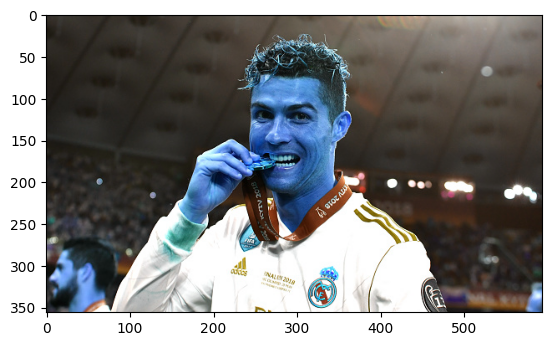

1/1 [==============================] - 1s 851ms/step
[[0.01166648 0.99963385]]
1
The person has a mask


In [73]:
input_image_path = input("Path of image to predict: ")
input_image = cv2.imread(input_image_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR)

#img1 = mping.imread(input_image)

im1plot = plt.imshow(input_image)
plt.show();

input_image_resize = cv2.resize(input_image, (128, 128))
input_image_scale = input_image_resize / 255
input_image_reshape = np.reshape(input_image_scale, [1, 128, 128, 3])
input_prediction = model.predict(input_image_reshape)
print(input_prediction)
input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)

if input_prediction_label == 1:
    print("The person has a mask")
else:
    print("The person does not have a mask")